In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
import plotly.express as px
from sklearn.metrics import silhouette_score,silhouette_samples,davies_bouldin_score
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/Hp/Downloads/marketing_campaign/marketing_campaign.csv",sep="\t")

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
data.corr()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2652\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [5]:
data = data[["Income","Year_Birth","Education","Marital_Status","Kidhome","Teenhome","Recency","MntWines"]]
data

,Income,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines
0,58138.0,1957,Graduation,Single,0,0,58,635
1,46344.0,1954,Graduation,Single,1,1,38,11
2,71613.0,1965,Graduation,Together,0,0,26,426
3,26646.0,1984,Graduation,Together,1,0,26,11
4,58293.0,1981,PhD,Married,1,0,94,173
...,...,...,...,...,...,...,...,...
2235,61223.0,1967,Graduation,Married,0,1,46,709
2236,64014.0,1946,PhD,Together,2,1,56,406
2237,56981.0,1981,Graduation,Divorced,0,0,91,908
2238,69245.0,1956,Master,Together,0,1,8,428


In [6]:
data.isna().sum()

Income            24
Year_Birth         0
Education          0
Marital_Status     0
Kidhome            0
Teenhome           0
Recency            0
MntWines           0
dtype: int64

In [7]:
data["Income"].fillna(data["Income"].median(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2652\368225885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Income"].fillna(data["Income"].median(), inplace=True)


In [8]:
data.isna().sum()

Income            0
Year_Birth        0
Education         0
Marital_Status    0
Kidhome           0
Teenhome          0
Recency           0
MntWines          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2240 non-null   float64
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Kidhome         2240 non-null   int64  
 5   Teenhome        2240 non-null   int64  
 6   Recency         2240 non-null   int64  
 7   MntWines        2240 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 140.1+ KB


In [10]:
# numerical_data = data.select_dtypes("int64","float64")
# numerical_data

In [11]:
# obj_data = data.select_dtypes("object")
# obj_data

In [12]:
# data = np.concatenate([numerical_data,obj_data],axis  = 1)

In [13]:
data2 = data.copy()

In [14]:
data2.head()

,Income,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines
0,58138.0,1957,Graduation,Single,0,0,58,635
1,46344.0,1954,Graduation,Single,1,1,38,11
2,71613.0,1965,Graduation,Together,0,0,26,426
3,26646.0,1984,Graduation,Together,1,0,26,11
4,58293.0,1981,PhD,Married,1,0,94,173


# Year_Birth

In [15]:
print("min Year_Birth : ",data2["Year_Birth"].min())
print("max Year_Birth : ",data2["Year_Birth"].max())

min Year_Birth :  1893
max Year_Birth :  1996


In [16]:
data2["Year_Birth_Segment"] = pd.cut(x = data2.Year_Birth,bins = 5)

In [17]:
data2

,Income,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,Year_Birth_Segment
0,58138.0,1957,Graduation,Single,0,0,58,635,"(1954.8, 1975.4]"
1,46344.0,1954,Graduation,Single,1,1,38,11,"(1934.2, 1954.8]"
2,71613.0,1965,Graduation,Together,0,0,26,426,"(1954.8, 1975.4]"
3,26646.0,1984,Graduation,Together,1,0,26,11,"(1975.4, 1996.0]"
4,58293.0,1981,PhD,Married,1,0,94,173,"(1975.4, 1996.0]"
...,...,...,...,...,...,...,...,...,...
2235,61223.0,1967,Graduation,Married,0,1,46,709,"(1954.8, 1975.4]"
2236,64014.0,1946,PhD,Together,2,1,56,406,"(1934.2, 1954.8]"
2237,56981.0,1981,Graduation,Divorced,0,0,91,908,"(1975.4, 1996.0]"
2238,69245.0,1956,Master,Together,0,1,8,428,"(1954.8, 1975.4]"


In [18]:
data2.groupby("Year_Birth_Segment").count()

,Income,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines
Year_Birth_Segment,,,,,,,,
"(1892.897, 1913.6]",3,3,3,3,3,3,3,3
"(1913.6, 1934.2]",0,0,0,0,0,0,0,0
"(1934.2, 1954.8]",316,316,316,316,316,316,316,316
"(1954.8, 1975.4]",1226,1226,1226,1226,1226,1226,1226,1226
"(1975.4, 1996.0]",695,695,695,695,695,695,695,695


In [19]:
data2.groupby("Year_Birth_Segment").size()

Year_Birth_Segment
(1892.897, 1913.6]       3
(1913.6, 1934.2]         0
(1934.2, 1954.8]       316
(1954.8, 1975.4]      1226
(1975.4, 1996.0]       695
dtype: int64

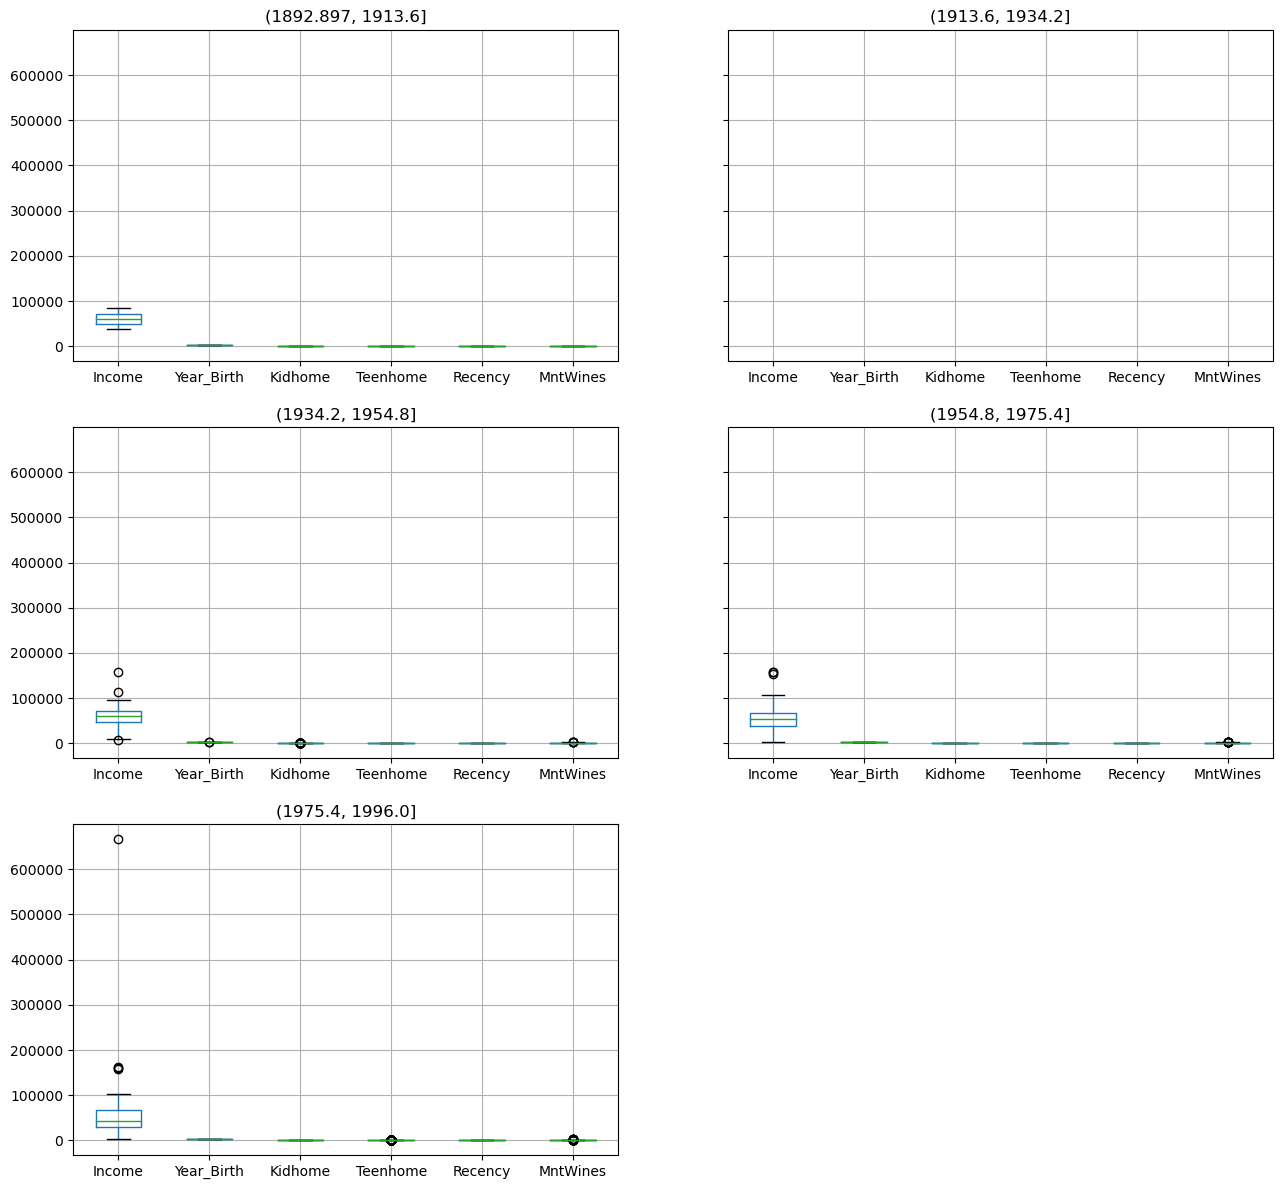

In [20]:
data2.groupby("Year_Birth_Segment").boxplot(figsize=(15,15))
plt.show()

# MntWines

In [22]:
data3 = data.copy()

In [23]:
print("min MntWines : ",data3["MntWines"].min())
print("max MntWines : ",data3["MntWines"].max())

min MntWines :  0
max MntWines :  1493


In [30]:
data3["MntWines_Segment"] = pd.cut(x = data3.MntWines,bins = [0,300,600,900,1200,1500])

In [31]:
data3

,Income,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntWines_Segment
0,58138.0,1957,Graduation,Single,0,0,58,635,"(600, 900]"
1,46344.0,1954,Graduation,Single,1,1,38,11,"(0, 300]"
2,71613.0,1965,Graduation,Together,0,0,26,426,"(300, 600]"
3,26646.0,1984,Graduation,Together,1,0,26,11,"(0, 300]"
4,58293.0,1981,PhD,Married,1,0,94,173,"(0, 300]"
...,...,...,...,...,...,...,...,...,...
2235,61223.0,1967,Graduation,Married,0,1,46,709,"(600, 900]"
2236,64014.0,1946,PhD,Together,2,1,56,406,"(300, 600]"
2237,56981.0,1981,Graduation,Divorced,0,0,91,908,"(900, 1200]"
2238,69245.0,1956,Master,Together,0,1,8,428,"(300, 600]"


In [32]:
data3.groupby("MntWines_Segment").count()

,Income,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines
MntWines_Segment,,,,,,,,
"(0, 300]",1358,1358,1358,1358,1358,1358,1358,1358
"(300, 600]",444,444,444,444,444,444,444,444
"(600, 900]",246,246,246,246,246,246,246,246
"(900, 1200]",137,137,137,137,137,137,137,137
"(1200, 1500]",42,42,42,42,42,42,42,42


In [33]:
data3.groupby("MntWines_Segment").size()

MntWines_Segment
(0, 300]        1358
(300, 600]       444
(600, 900]       246
(900, 1200]      137
(1200, 1500]      42
dtype: int64

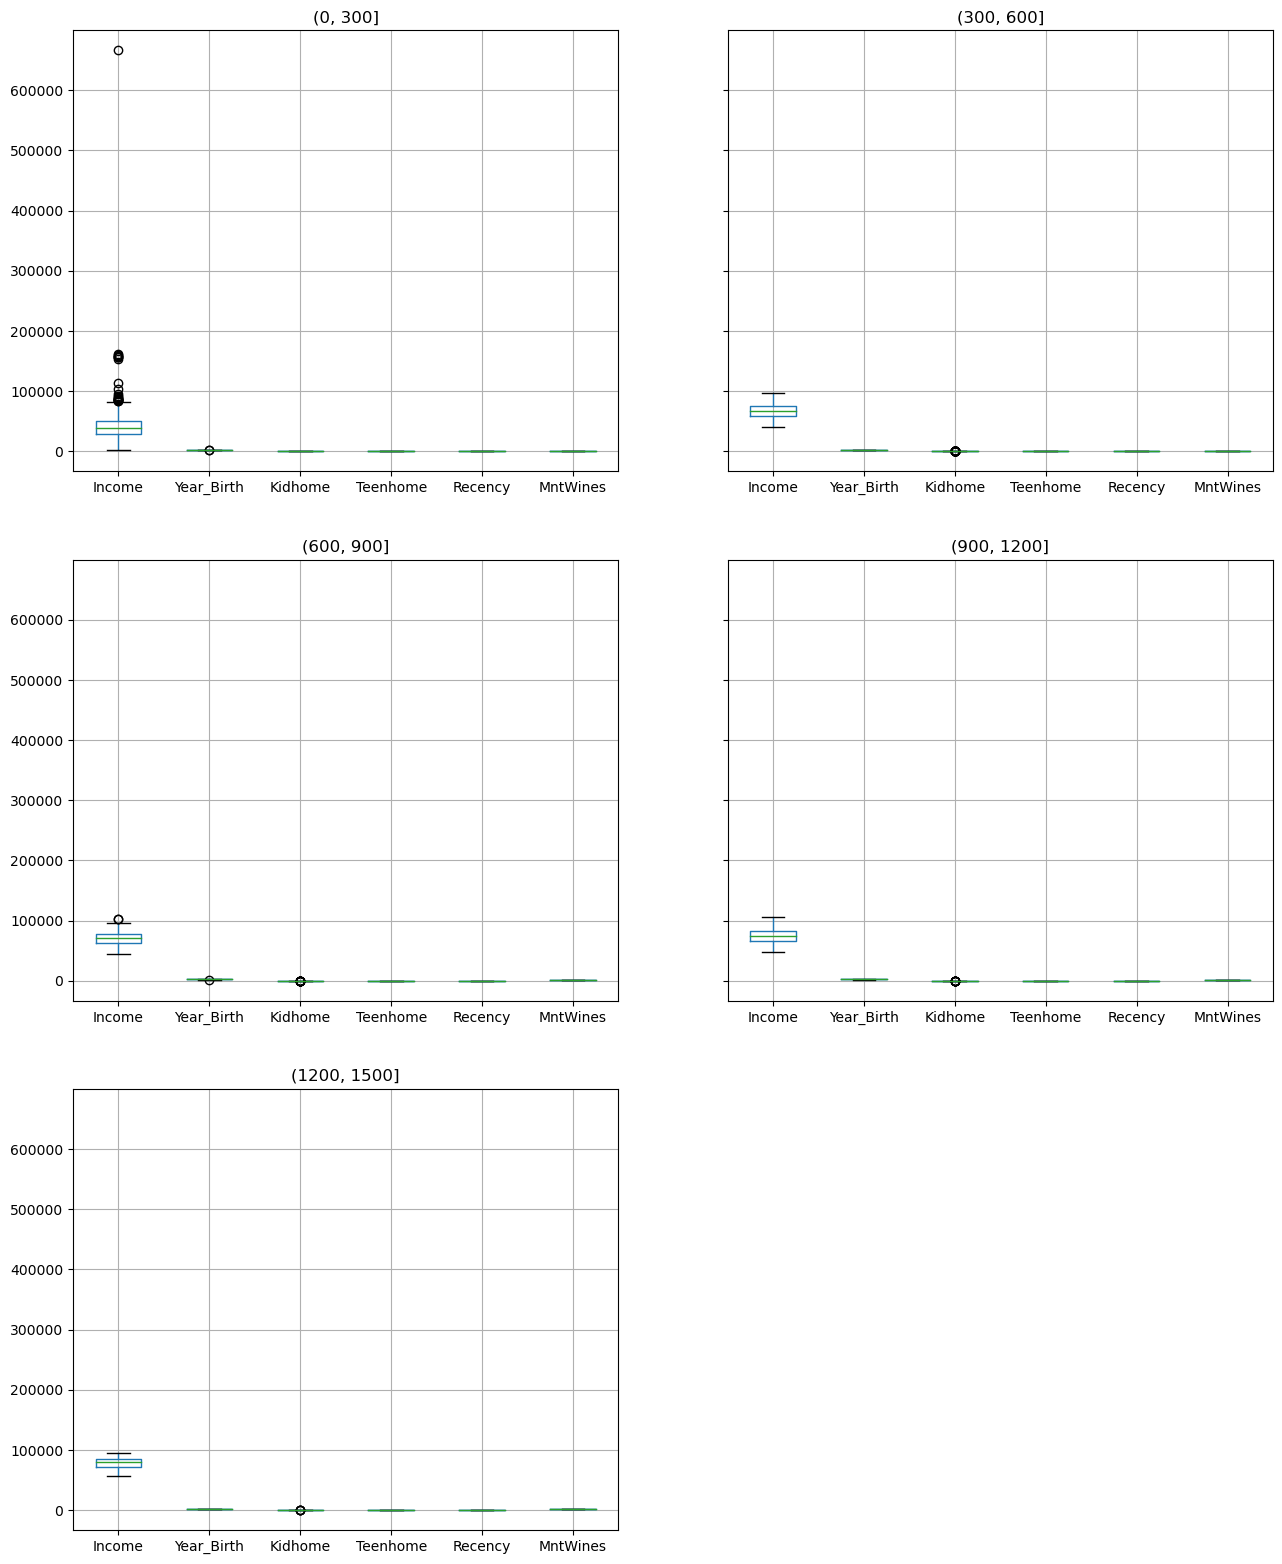

In [38]:
data3.groupby("MntWines_Segment").boxplot(figsize=(15,20))
plt.show()